### __Wind__

In [34]:
# Create data frame for games3 with temps between -10 and 10
games3 = games[(games['Wind'] >= -10) & (games['Wind'] < 10) & (games['Runs'] < 10)].copy()

w1 = games3['Runs'][(games3['Wind'] >= -10) & (games3['Wind'] < -3)]
w2 = games3['Runs'][(games3['Wind'] >= -3) & (games3['Wind'] < 3)]
w3 = games3['Runs'][(games3['Wind'] >= 3) & (games3['Wind'] < 10)]

games3['Wind_Level1'] = 0
games3.loc[games3.Wind < -3, 'Wind_Level1'] = 1
games3.loc[(games3.Wind >= -3) & (games3.Wind < 3), 'Wind_Level1'] = 2
games3.loc[games3.Wind >= 3, 'Wind_Level1'] = 3

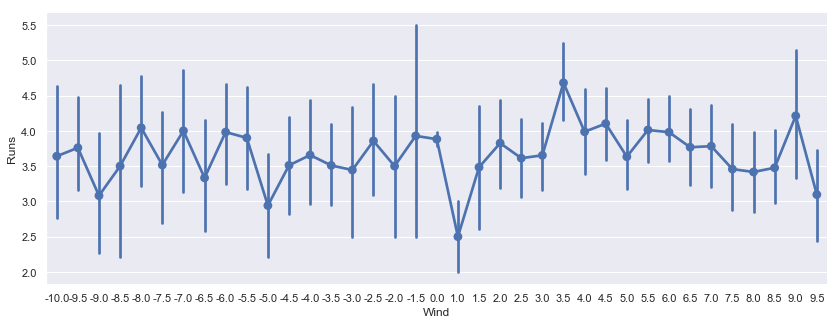

In [35]:
sns.set()
f, ax = plt.subplots(figsize=(14, 5))
sns.pointplot('Wind', 'Runs', data=games3)
sns.despine(bottom=True)
plt.show()

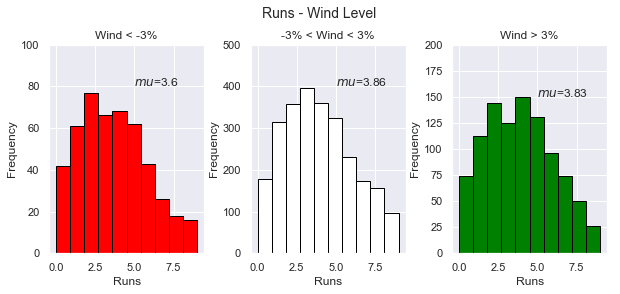

In [36]:
fig = plt.figure(figsize = (10,4))
title = fig.suptitle("Runs - Wind Level", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,3, 1)
ax1.set_title("Wind < {}%".format(-3))
ax1.set_xlabel("Runs")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 100])
ax1.text(5, 80, r'$mu$='+str(round(games3['Runs'][games3['Wind_Level1']==1].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(games3['Runs'][games3['Wind_Level1']==1], color='red', bins=10,
                                     edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,3, 2)
ax2.set_title("{0}% < Wind < {1}%".format(-3, 3))
ax2.set_xlabel("Runs")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 500])
ax2.text(5, 400, r'$mu$='+str(round(games3['Runs'][games3['Wind_Level1']==2].mean(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(games3['Runs'][games3['Wind_Level1']==2], color='white', bins=10,
                                     edgecolor='black', linewidth=1)


ax3 = fig.add_subplot(1,3, 3)
ax3.set_title("Wind > {}%".format(3))
ax3.set_xlabel("Runs")
ax3.set_ylabel("Frequency")
ax3.set_ylim([0, 200])
ax3.text(5, 150, r'$mu$='+str(round(games3['Runs'][games3['Wind_Level1']==3].mean(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax3.hist(games3['Runs'][games3['Wind_Level1']==3], color='green', bins=10,
                                      edgecolor='black', linewidth=1)

In [37]:
X = games3['Wind'] ## X usually means our input variables (or independent variables)
y = games3['Runs'] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)
res = model.resid # residuals
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Runs   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1862
Date:                Mon, 07 Oct 2019   Prob (F-statistic):              0.666
Time:                        00:01:59   Log-Likelihood:                -9283.1
No. Observations:                4044   AIC:                         1.857e+04
Df Residuals:                    4042   BIC:                         1.858e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8190      0.038     99.205      0.000       3.744       3.895
Wind           0.0043      0.010      0.431      0.666      -0.015       0.024
==============================================================================
Omnibus:                      315.506   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.828
Skew:                           0.317   Prob(JB):                     3.24e-35
Kurtosis:                       2.264   Cond. No.                         3.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

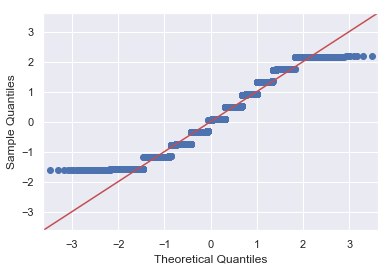

In [38]:
fig = sm.qqplot(res, stats.t, fit=True, line='45')
plt.show()

In [39]:
X = games1['Temp']
y = games1['Runs']

model = sm.discrete.count_model.ZeroInflatedNegativeBinomialP(X, y).fit()
predictions = model.predict(X)

AttributeError: module 'statsmodels.api' has no attribute 'discrete'

In [ ]:
w1_bootstrap = bootstrap(w1, 10000)
w1_bootstrap = np.mean(w1_bootstrap, axis=1)
w2_bootstrap = bootstrap(w2, 10000)
w2_bootstrap = np.mean(w2_bootstrap, axis=1)
w3_bootstrap = bootstrap(w3, 10000)
w3_bootstrap = np.mean(w3_bootstrap, axis=1)
#w_all_bootstrap = bootstrap(w_all, 10000)
#w_all_bootstrap = np.mean(w_all_bootstrap, axis=1)

differences1 = (w3_bootstrap - w1_bootstrap)
differences2 = (w3_bootstrap - w2_bootstrap)
differences3 = (w2_bootstrap - w1_bootstrap)

In [ ]:
fig = plt.figure(figsize=(10,8))
fig.subplots_adjust(top=0.85, hspace=0.85, wspace=0.3)

lower_bound_w3 = np.percentile(w3_bootstrap, 2.5)
upper_bound_w3 = np.percentile(w3_bootstrap, 97.5)

ax1 = fig.add_subplot(3,1, 1)
ax1.set_xlabel('Runs')
ax1.set_ylabel('Frequency')
ax1.axvline(lower_bound_w3, color='r', label=round(lower_bound_w3,3))
ax1.axvline(upper_bound_w3, color='r', label=round(upper_bound_w3,3))
ax1.set_title('Bootstrapped Population: w3')
ax1_hist = ax1.hist(w3_bootstrap, bins=30)
ax1.legend()

lower_bound_w2 = np.percentile(w2_bootstrap, 2.5)
upper_bound_w2 = np.percentile(w2_bootstrap, 97.5)

ax2 = fig.add_subplot(3,1, 2)
ax2.set_xlabel('Runs')
ax2.set_ylabel('Frequency')
ax2.axvline(lower_bound_w2, color='r', label=round(lower_bound_w2,3))
ax2.axvline(upper_bound_w2, color='r', label=round(upper_bound_w2,3))
ax2.set_title('Bootstrapped Population: w2')
ax2_hist = ax2.hist(w2_bootstrap, bins=30)
ax2.legend()

lower_bound_w1 = np.percentile(w1_bootstrap, 2.5)
upper_bound_w1 = np.percentile(w1_bootstrap, 97.5)

ax3 = fig.add_subplot(3,1, 3)
ax3.set_xlabel('Runs')
ax3.set_ylabel('Frequency')
ax3.axvline(lower_bound_w1, color='r', label=round(lower_bound_w1,3))
ax3.axvline(upper_bound_w1, color='r', label=round(upper_bound_w1,3))
ax3.set_title('Bootstrapped Population: w1')
ax3_hist = ax3.hist(w1_bootstrap, bins=30)
ax3.legend()
plt.show()

print('95% Confidence Intervals for Temperature Categories')
print('{0}:     Lower bound: {1:5.3f}     Upper bound: {2:5.3f}'.format("w3", lower_bound_w3, upper_bound_w3))
print('{0}:     Lower bound: {1:5.3f}     Upper bound: {2:5.3f}'.format("w2", lower_bound_w2, upper_bound_w2))
print('{0}:     Lower bound: {1:5.3f}     Upper bound: {2:5.3f}'.format("w1", lower_bound_w1, upper_bound_w1))

In [ ]:
lower_bound1 = np.percentile(differences1, 2.5)
upper_bound1 = np.percentile(differences1, 97.5)
lower_bound2 = np.percentile(differences2, 2.5)
upper_bound2 = np.percentile(differences2, 97.5)
lower_bound3 = np.percentile(differences3, 2.5)
upper_bound3 = np.percentile(differences3, 97.5)

fig = plt.figure(figsize=(10,8))
fig.subplots_adjust(top=0.85, hspace=0.6)

ax1 = fig.add_subplot(3, 1, 1)
ax1.set_xlabel('Difference in Runs')
ax1.set_ylabel('Frequency')
ax1.axvline(lower_bound1, color='r', label=round(lower_bound1,3))
ax1.axvline(upper_bound1, color='r', label=round(upper_bound1,3))
ax1.set_title('Bootstrapped Population (Difference Between w3, w1)')
ax1_hist = ax1.hist(differences1, bins=30)
ax1.legend()

ax2 = fig.add_subplot(3, 1, 2)
ax2.set_xlabel('Difference in Runs')
ax2.set_ylabel('Frequency')
ax2.axvline(lower_bound2, color='r', label=round(lower_bound2,3))
ax2.axvline(upper_bound2, color='r', label=round(upper_bound2,3))
ax2.set_title('Bootstrapped Population (Difference Between w3, w2)')
ax2_hist = ax2.hist(differences2, bins=30)
ax2.legend()

ax3 = fig.add_subplot(3, 1, 3)
ax3.set_xlabel('Difference in Runs')
ax3.set_ylabel('Frequency')
ax3.axvline(lower_bound3, color='r', label=round(lower_bound3,3))
ax3.axvline(upper_bound3, color='r', label=round(upper_bound3,3))
ax3.set_title('Bootstrapped Population (Difference Between w2, w1)')
ax3_hist = ax3.hist(differences3, bins=30)
ax3.legend()
plt.show()

print('95% Confidence Intervals for Mean Differce between {} & {}:'.format('w3', 'w1'))
print('Lower bound: {0:5.3f}'.format(lower_bound1))
print('Upper bound: {0:5.3f}'.format(upper_bound1))

p1 = differences1[differences1 <= 0].shape[0]
print("Number of samples where (mean) w1 > w3: {}\n".format(p1))

print('95% Confidence Intervals for Mean Differce between {} & {}:'.format('w3', 'w2'))
print('Lower bound: {0:5.3f}'.format(lower_bound2))
print('Upper bound: {0:5.3f}'.format(upper_bound2))

p2 = differences2[differences2 <= 0].shape[0]
print("Number of samples where (mean) w2 > w3: {}\n".format(p2))

print('95% Confidence Intervals for Mean Differce between {} & {}:'.format('w2', 'w1'))
print('Lower bound: {0:5.3f}'.format(lower_bound3))
print('Upper bound: {0:5.3f}'.format(upper_bound3))

p3 = differences3[differences3 <= 0].shape[0]
print("Number of samples where (mean) w1 > w2: {}".format(p3))

In [ ]:
combined = np.concatenate((w3, w2, w1), axis=0)

perms_w1 = []
perms_w2 = []
perms_w3 = []

for i in range(10000):
    np.random.seed(i)
    perms_w1.append(resample(combined, n_samples = len(w1)))
    perms_w2.append(resample(combined, n_samples = len(w2)))
    perms_w3.append(resample(combined, n_samples = len(w3)))
    
dif_bootstrap_means1 = (np.mean(perms_w3, axis=1)-np.mean(perms_w1, axis=1))
dif_bootstrap_means2 = (np.mean(perms_w3, axis=1)-np.mean(perms_w2, axis=1))
dif_bootstrap_means3 = (np.mean(perms_w2, axis=1)-np.mean(perms_w1, axis=1))

In [ ]:
obs_difs1 = np.mean(w3) - np.mean(w1)
obs_difs2 = np.mean(w3) - np.mean(w2)
obs_difs3 = np.mean(w2) - np.mean(w1)

p_value1 = dif_bootstrap_means1[dif_bootstrap_means1 >= obs_difs1].shape[0]/10000
p_value2 = dif_bootstrap_means2[dif_bootstrap_means2 >= obs_difs2].shape[0]/10000
p_value3 = dif_bootstrap_means3[dif_bootstrap_means3 >= obs_difs3].shape[0]/10000

fig = plt.figure(figsize=(12,4))
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,3, 1)
ax1.set_xlabel('Difference in Runs (w3 - w1)')
ax1.set_ylabel('Frequency')
ax1.set_title('Bootstrapped Population (Combined data)')
ax1.axvline(obs_difs1, color='r')
d1 = ax1.hist(dif_bootstrap_means1, bins=30)

ax2 = fig.add_subplot(1,3, 2)
ax2.set_xlabel('Difference in Runs (w3 - w2)')
ax2.set_ylabel('Frequency')
ax2.set_title('Bootstrapped Population (Combined data)')
ax2.axvline(obs_difs2, color='r')
d2 = ax2.hist(dif_bootstrap_means2, bins=30)

ax3 = fig.add_subplot(1,3, 3)
ax3.set_xlabel('Difference in Runs (w2 - w1)')
ax3.set_ylabel('Frequency')
ax3.set_title('Bootstrapped Population (Combined data)')
ax3.axvline(obs_difs3, color='r')
d3 = ax3.hist(dif_bootstrap_means3, bins=30)
plt.show()

print('observed difference in means: {0:5.4f} [w3,w1]'.format(obs_difs1))
print('observed difference in means: {0:5.4f} [w3,w2]'.format(obs_difs2))
print('observed difference in means: {0:5.4f} [w2,w1]'.format(obs_difs3))

print('p-value: {} [w3,w1]'.format(p_value1))
print('p-value: {} [w3,w2]'.format(p_value2))
print('p-value: {} [w2,w1]'.format(p_value3))

In [ ]:
anova = stats.f_oneway(w1, w2, w3)
print("anova p-value: {0:5.4f}".format(anova[1]))
print("anova z-value: {0:5.2f}\n".format(anova[0]))

rho, pval = stats.spearmanr(games3['Wind_Level1'], games3['Runs'])
print("spearman p-value: {0:4.3f}".format(pval))
print("spearman rho-value: {0:4.3f}\n".format(rho))

pt1 = pg.pairwise_tukey(dv='Runs', between='Wind_Level1', data=games3, tail='one-sided')
print(pt1)

There is a significant difference between runs scored with the wind blowing in and with the wind at less than 3mph.  However, the magnitude of the effect size is small as can be seen by the effect sizes.